<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/UsingMIMICIIIDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cài đặt gói wfdb

In [1]:
pip install wfdb

     |████████████████████████████████| 137 kB 4.9 MB/s 


In [4]:
rdsamp -r mimic3wdb/31/3141595/ -p -v -t 10

SyntaxError: ignored

In [3]:
! git clone https://github.com/MIT-LCP/wfdb-python.git

Cloning into 'wfdb-python'...
remote: Enumerating objects: 4671, done.
remote: Counting objects: 100% (374/374), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 4671 (delta 244), reused 248 (delta 161), pack-reused 4297
Receiving objects: 100% (4671/4671), 165.42 MiB | 18.69 MiB/s, done.
Resolving deltas: 100% (3076/3076), done.
Checking out files: 100% (221/221), done.


In [6]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

### Đọc một file dữ liệu trong mimic3wdb
* Thư mục năm trên phisionet ở địa chỉ"
  https://physionet.org/content/mimic3wdb/1.0/31/3141595/
  

### Đọc header file

In [44]:
record2 = wfdb.rdheader('3141595n', pn_dir='mimic3wdb/31/3141595')
display(record2.__dict__)

{'adc_gain': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'adc_res': [16, 16, 16, 16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 2, 52),
 'baseline': [0, 0, 0, 0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None, None, None, None],
 'checksum': [29726, -25932, 8715, -14954, -26331, -11099, 6171, 29829],
 'comments': ['Location: nicu'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat'],
 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16'],
 'fs': 1,
 'init_value': [142, 145, -32768, -32768, -32768, -32768, 49, 95],
 'n_sig': 8,
 'p_signal': None,
 'record_name': '3141595n',
 'samps_per_frame': [1, 1, 1, 1, 1, 1, 1, 1],
 'sig_len': 1938730,
 'sig_name': ['HR',
 

#### Đọc bản ghi

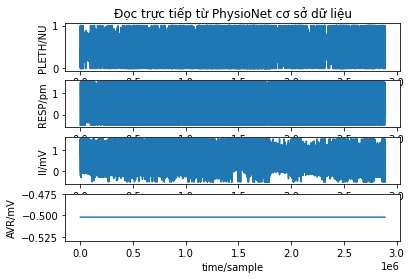

{'adc_gain': [1023.0, 515.0, 510.0, 510.0],
 'adc_res': [10, 10, 10, 10],
 'adc_zero': [512, 512, 512, 512],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 2, 51, 840000),
 'baseline': [0, 254, 256, 256],
 'block_size': [0, 0, 0, 0],
 'byte_offset': [None, None, None, None],
 'checksum': [-12412, 19668, 13968, 0],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3141595_0001.dat',
  '3141595_0001.dat',
  '3141595_0001.dat',
  '3141595_0001.dat'],
 'fmt': ['16', '16', '16', '16'],
 'fs': 125,
 'init_value': [470, 0, 565, 0],
 'n_sig': 4,
 'p_signal': array([[ 0.45943304, -0.49320388,  0.60588235, -0.50196078],
        [ 0.45356794, -0.49320388,  0.62941176, -0.50196078],
        [ 0.44965787, -0.49320388,  0.62941176, -0.50196078],
        ...,
        [ 0.79472141,  0.        , -0.50196078, -0.50196078],
        [ 0.79081134,  0.        , -0.50196078, -0.50196078],
        [ 0.78690127,  0. 

In [11]:
record2 = wfdb.rdrecord('3141595_0001', pn_dir='mimic3wdb/31/3141595')
wfdb.plot_wfdb(record=record2, title='Đọc trực tiếp từ PhysioNet cơ sở dữ liệu') 
display(record2.__dict__)

#### Đọc một phân đoạn tín hiệu 

In [29]:
signals, fields = wfdb.rdsamp('3141595_0001', sampfrom=0, sampto=2888500, pn_dir='mimic3wdb/31/3141595')

Thông tin về dữ liệu

In [33]:
fields

{'base_date': None,
 'base_time': datetime.time(10, 2, 51, 840000),
 'comments': [],
 'fs': 125,
 'n_sig': 4,
 'sig_len': 2888500,
 'sig_name': ['PLETH', 'RESP', 'II', 'AVR'],
 'units': ['NU', 'pm', 'mV', 'mV']}

In [18]:
np.shape(signals)

(14900, 4)

Mô tả một đoạn dữ liệu

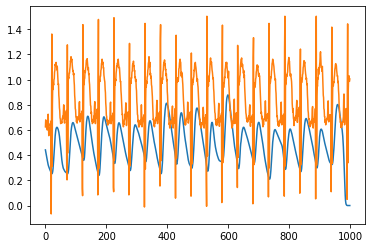

In [38]:
start = 10000
step = 1000
plt.plot(signals[start:start + step,[0,2]])